# Exploring a New Dataset

Before running analysis on a new dataset, one must first explore the data to gain an understanding of what they are working with. This notebook contains an example of doing this with the primary dataset used in this repository, BusinessAnalyst, which was sourced from https://www.kaggle.com/andrewmvd/business-analyst-jobs.

In [11]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import seaborn as sns
import matplotlib as plt

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/BusinessAnalyst.csv")
print(df.head()) #shows the first several rows of the dataset

   index                                         Job Title  \
0      0  Business Analyst - Clinical & Logistics Platform   
1      1                                      Data Analyst   
2      2   Information Security Analyst, Incident Response   
3      3                     Analyst - FP&A Global Revenue   
4      4                     Investment Analyst - Graduate   

               Salary Estimate  \
0  $56K-$102K (Glassdoor est.)   
1  $56K-$102K (Glassdoor est.)   
2  $56K-$102K (Glassdoor est.)   
3  $56K-$102K (Glassdoor est.)   
4  $56K-$102K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Company Overview\n\n\nAt Memorial Sloan Ketter...     3.9   
1  For more than a decade, Asembia has been worki...     3.6   
2  Job Description Summary\nThe Information Secur...     3.6   
3  Magnite is the world's largest independent sel...     3.4   
4  About Swiss Re\n\nThe Swiss Re Group is one of...     3.8   

               Company Name          

In [5]:
#size of dataset
print(df.shape)

(2444, 14)


This dataset contains 2444 examples and 14 variables, including ID

In [6]:
#Check for missing values
missing_df = df.isnull().sum()
print(missing_df)

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


No missing values were found

AttributeError: module 'matplotlib' has no attribute 'xticks'

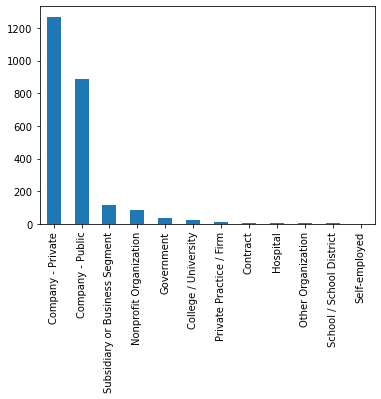

In [14]:
#Exploring how many examples there are of each target variable
df['Type of ownership'].value_counts().plot(kind='bar')

#Add count over the bar
ax=df['Type of ownership'].value_counts().plot.bar(width=.8)
for i, v in df['Type of ownership'].value_counts().reset_index().iterrows():
    ax.text(i, v.Type_of_ownership + 0.3, v.Species, color='blue')

plt.xlabel('Type of Ownership')
plt.ylabel('Count')
plt.title('Count of Business Analyst Postings Company Ownership Model')
plt.show()